<a href="https://colab.research.google.com/github/LeyanTang/ML-DL-Project/blob/main/Sentiment_Analysis_Zara_App_Store_Customer_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web scraping and data acquisition

In [ ]:
pip install app_store_scraper

In [ ]:
import pandas as pd
import numpy as np
import json

from app_store_scraper import AppStore
zara = AppStore(country='us', app_name='ZARA', app_id = '547951480')

zara.review(how_many=2000)

In [ ]:
# convert the scraped json file to dataframe and store it in "zaradf"
df = pd.DataFrame(np.array(zara.reviews),columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df.head()

,date,review,rating,isEdited,userName,title
0,2018-11-07 17:21:10,"My go-to for office, evening. Lazy days, gifts...",5,False,LYNJU27,The best most stylist clothing for everyone
1,2022-05-12 11:11:11,I am a small waisted curvy hip and got a nice ...,5,False,LOCQUEEN143,Just Right
2,2021-06-16 13:46:44,"Although a bit pricey for their basic designs,...",1,False,"Odom, E.",First time shopping. I’d rate Zero stars if it...
3,2019-11-07 16:14:18,I put in a large order and needed to change th...,1,False,Wolfie25242,DO NOT ORDER ONLINE!!!
4,2021-12-28 16:06:58,My review isn’t per say about the App but more...,1,False,Francj091,Customer Service Lacked


In [ ]:
# inspect the data types of all columns
df.dtypes

date        datetime64[ns]
review              object
rating               int64
isEdited              bool
userName            object
title               object
dtype: object

In [ ]:
# convert the datatype of two columns to string for further text analysis
df['review'] = df['review'].astype(str)
df['title'] = df['title'].astype(str)

# Descriptive analysis

### Summary statistics for ratings

In [ ]:
# Calculate multiple statistics for ratings
rating_statistics = zaradf['rating'].describe()
print(rating_statistics)

count    2000.00000
mean        3.24950
std         1.72184
min         1.00000
25%         1.00000
50%         3.00000
75%         5.00000
max         5.00000
Name: rating, dtype: float64


<Axes: ylabel='rating'>

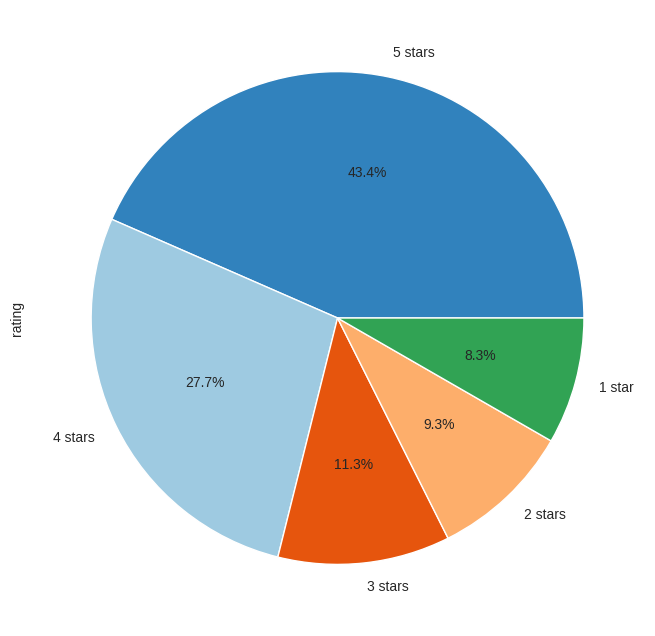

In [ ]:
plt.figure(figsize=(16,8))
labels = ["5 stars", "4 stars", "3 stars", "2 stars", "1 star"]
cmap = plt.get_cmap("tab20c")
df["rating"].value_counts().plot.pie(autopct='%1.1f%%', labels=labels, colors = cmap(np.arange(5)*2))

## Review Counts by Rating

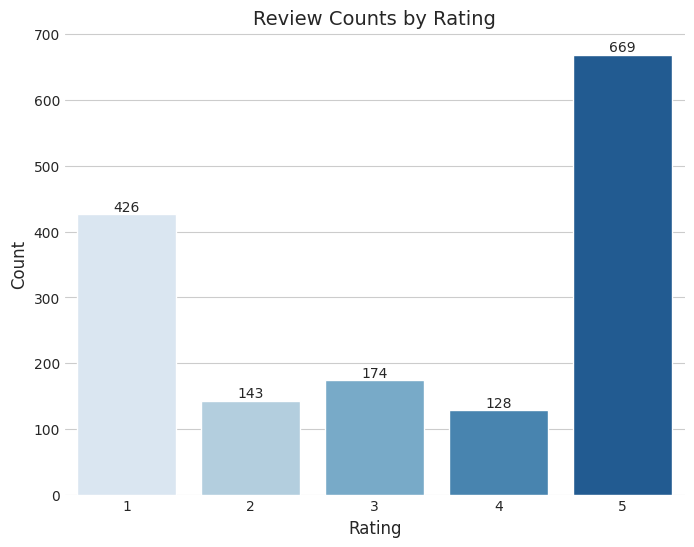

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for review counts by rating with improved aesthetics
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")  # Set the style to whitegrid

# Sort the ratings for better visualization
sorted_ratings = df['rating'].value_counts().sort_index()

# Create the bar chart
ax = sns.barplot(x=sorted_ratings.index, y=sorted_ratings, palette="Blues")

plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review Counts by Rating', fontsize=14)

for i, count in enumerate(sorted_ratings):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

plt.show()

## Review Length and Title Length

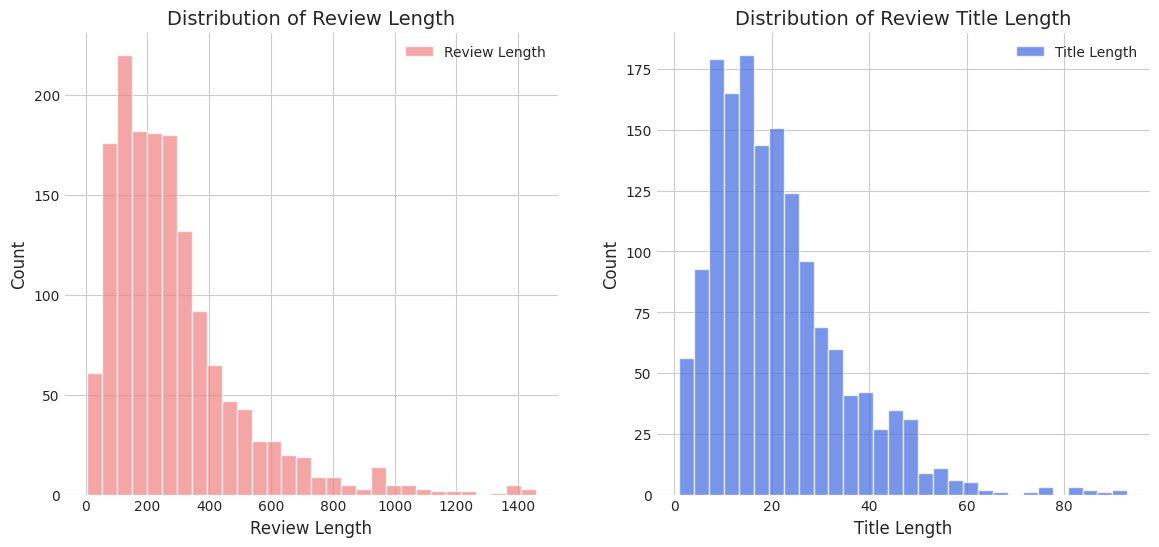

In [ ]:
import matplotlib.pyplot as plt

# Calculate the length of reviews and titles
df['review_length'] = df['review'].apply(len)
df['title_length'] = df['title'].apply(len)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram for review length
ax1.hist(df['review_length'], bins=30, color='lightcoral', alpha=0.7, label='Review Length')
ax1.set_xlabel('Review Length', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Distribution of Review Length', fontsize=14)
ax1.grid(True)

# Plot the histogram for title length
ax2.hist(df['title_length'], bins=30, color='royalblue', alpha=0.7, label='Title Length')
ax2.set_xlabel('Title Length', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('Distribution of Review Title Length', fontsize=14)
ax2.grid(True)

# Add legends
ax1.legend()
ax2.legend()

plt.show()

## Time-based distribution of reviews

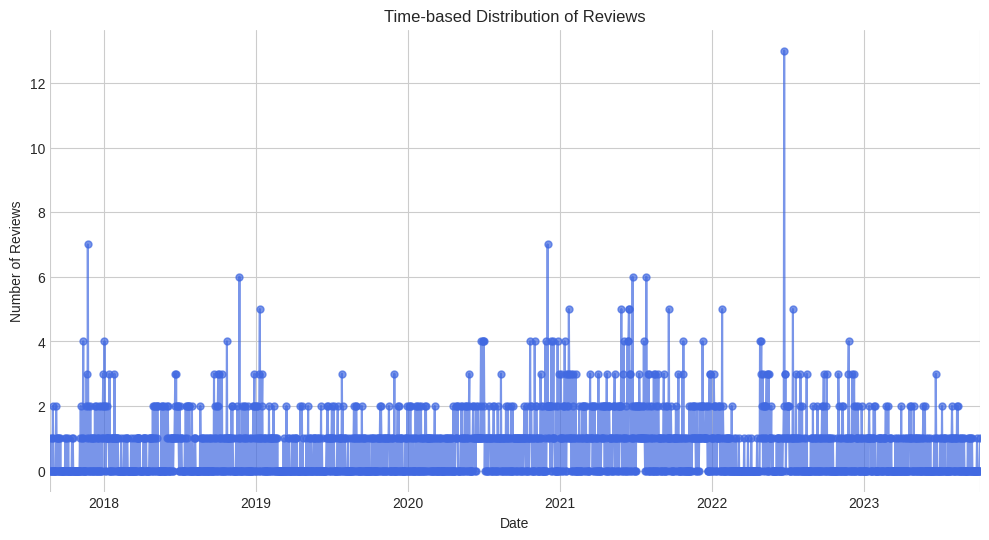

In [ ]:
# Convert the 'date' column to a datetime format
df['date'] = pd.to_datetime(df['date'])

# Group reviews by day and count the number of reviews for each day
reviews_per_day = df.resample('D', on='date').size()

# Plot the time-based distribution of reviews with custom styling
plt.figure(figsize=(12, 6))
reviews_per_day.plot(color='royalblue', marker='o', markersize=5, alpha=0.7)
plt.title('Time-based Distribution of Reviews')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.style.use('seaborn-darkgrid')  # Apply a predefined style
plt.show()

## Word Cloud

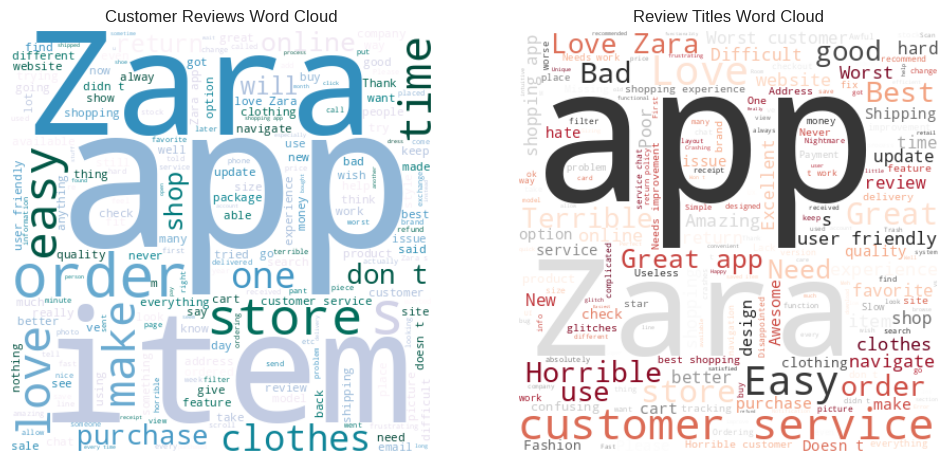

In [ ]:
from wordcloud import WordCloud
import random

# Define custom color palettes for each word cloud
custom_palette_reviews = ['#FF5733', '#33FF57', '#3366FF', '#FF33D1', '#FFFF33']
custom_palette_titles = ['#33D1FF', '#FF3366', '#33FF57', '#FF5733', '#FFFF33']

# Combine all customer reviews into a single text
reviews_text = " ".join(df['review'])

# Combine all review titles into a single text
titles_text = " ".join(df['title'])

# Create word clouds for reviews and titles with custom color palettes
wordcloud_reviews = WordCloud(width=400, height=400, background_color='white', colormap=random.choice(plt.colormaps())).generate(reviews_text)
wordcloud_titles = WordCloud(width=400, height=400, background_color='white', colormap=random.choice(plt.colormaps())).generate(titles_text)

# Create subplots for side-by-side word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot word cloud for customer reviews with custom color palette
axes[0].imshow(wordcloud_reviews, interpolation='bilinear')
axes[0].set_title('Customer Reviews Word Cloud')
axes[0].axis('off')

# Plot word cloud for review titles with custom color palette
axes[1].imshow(wordcloud_titles, interpolation='bilinear')
axes[1].set_title('Review Titles Word Cloud')
axes[1].axis('off')

plt.show()

## Clustering with Topic Modeling using LDA
### Step 1: Preprocessing text - Tokenizing sentences, stopwords removal and lemmatization

In [ ]:
df_orig= df.copy()
df_orig.shape

(1540, 8)

In [ ]:
def get_pos_tag(tag):
    """This function is used to get the part-of-speech(POS) for lemmatization"""

    if tag.startswith('N') or tag.startswith('J'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN #default case

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
def preprocess(text):
    """ 1. Removes Punctuations
        2. Removes words smaller than 3 letters
        3. Converts into lowercase
        4. Lemmatizes words
        5. Removes Stopwords
    """
    punctuation= list(string.punctuation)
    doc_tokens= nltk.word_tokenize(text)
    word_tokens= [word.lower() for word in doc_tokens if not (word in punctuation or len(word)<=3)]

    # Lemmatize
    pos_tags=nltk.pos_tag(word_tokens)
#     print(pos_tags)
    doc_words=[wordnet_lemmatizer.lemmatize(word, pos=get_pos_tag(tag)) for word, tag in pos_tags]
    doc_words= [word for word in doc_words if word not in stoplist]
    return doc_words

df_clean = df_orig['review'].apply(preprocess)
df_clean.head()

0    [go-to, office, even, lazy, day, gift, family,...
1    [small, waisted, curvy, nice, size, desire, de...
2    [although, pricey, basic, design, willing, tak...
3    [large, need, change, shipping, address, call,...
4    [review, customer, service, receive, item, 12/...
Name: review, dtype: object

### Step 2: Data cleaning - Procure only nouns and adjectives to obtain meaningful topics

In [ ]:
# Adding business stopwords to exclude

common_terms= ["wear","look","ordered","color","purchase","order"]

stoplist= stoplist+ common_terms

In [ ]:
# Tried multiple parts of speech and obtained best topic results using Nouns and Adjectives
def get_nouns_adjs(series):

    " Topic Modeling using only nouns and adjectives"

    pos_tags= nltk.pos_tag(series)
    all_adj_nouns= [word for (word, tag) in pos_tags if (tag=="NN" or tag=="NNS" or tag=="JJ")]
    return all_adj_nouns

df_nouns_adj = df_clean.apply(get_nouns_adjs)

### Step 3: Add bigrams to our corpus using Word2vec model from gensim

In [ ]:
# Importing gensim related libraries
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim.corpora import Dictionary
from gensim.models import Phrases
from collections import Counter
from gensim.models import Word2Vec

In [ ]:
docs= list(df_nouns_adj)
phrases = gensim.models.Phrases(docs, min_count=10, threshold=20)
bigram_model = gensim.models.phrases.Phraser(phrases)

In [ ]:
def make_bigrams(texts):
    return [bigram_model[doc] for doc in texts]

# Form Bigrams
data_words_bigrams = make_bigrams(docs)

In [ ]:
# Checkout most frequent bigrams :
bigram_counter1= Counter()
for key in phrases.vocab.keys():
    if key not in stopwords.words('english'):
        if len(str(key).split('_'))>1:
            bigram_counter1[key]+=phrases.vocab[key]

for key, counts in bigram_counter1.most_common(20):
    print(key,">>>>", counts)

customer_service >>>> 192
love_zara >>>> 70
easy_navigate >>>> 46
credit_card >>>> 33
shop_zara >>>> 32
item_cart >>>> 30
shop_online >>>> 26
zara_store >>>> 26
item_available >>>> 26
easy_shop >>>> 26
return_item >>>> 20
zara_customer >>>> 19
online_shopping >>>> 18
shopping_experience >>>> 18
multiple_time >>>> 18
return_policy >>>> 17
gift_card >>>> 17
user_experience >>>> 17
user_friendly >>>> 17
sale_item >>>> 17


In [ ]:
# Feeding the bigrams into a Word2Vec model produces more meaningful bigrams
from gensim.models import Word2Vec
from collections import Counter

# Define Word2Vec model settings
model_settings = {
    "vector_size": 100,
    "sg": 1,  # Skip-gram
    "hs": 0,  # Negative sampling
    "seed": 33,
    "epochs": 35
}

# Initialize the Word2Vec model
w2vmodel = Word2Vec(bigram_model[docs], **model_settings)

# Create a counter for bigrams
bigram_counter = Counter()

# Count and store meaningful bigrams
for key in w2vmodel.wv.key_to_index.keys():
    if len(key.split("_")) > 1:
        bigram_counter[key] += w2vmodel.wv.get_vecattr(key, "count")

# Print the top 30 bigrams
for key, counts in bigram_counter.most_common(30):
    print(key, ">>>>>", counts)

customer_service >>>>> 192
easy_navigate >>>>> 46
credit_card >>>>> 33
user_friendly >>>>> 17
gift_card >>>>> 17
return_policy >>>>> 17


In [ ]:
# Get the KeyedVectors from your Word2Vec model
wv = w2vmodel.wv

# Most often mentioned words along with the word 'return'
similar_words = wv.most_similar(positive=['return'], topn=10)

# Print the similar words
for word, score in similar_words:
    print(word, score)

accept 0.6976640224456787
security 0.6320679783821106
slip 0.624036431312561
mail 0.6150906682014465
condition 0.5975799560546875
return_policy 0.5974735617637634
form 0.5960174202919006
label 0.5939704775810242
fault 0.5937491655349731
credit 0.5900173783302307


In [ ]:
w2vmodel.wv.most_similar(['price','return'], ['great'], topn=5)

[('policy', 0.4804924726486206),
 ('accept', 0.46606379747390747),
 ('condition', 0.4601452052593231),
 ('slip', 0.45542237162590027),
 ('friday', 0.4349766969680786)]

### Step 4: Create a dictionary and corpus for input to our LDA model. Filter out the most common and uncommon words.

In [ ]:
dictionary= Dictionary(data_words_bigrams)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.6)
corpus = [dictionary.doc2bow(doc) for doc in docs]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 226
Number of documents: 1540


### Step 5: Train the LDA model- Topic Modeling

In [ ]:
from gensim.models.ldamulticore import LdaMulticore

t0= time.time()
passes= 150
np.random.seed(1) # setting up random seed to get the same results
ldamodel= LdaMulticore(corpus,
                    id2word=dictionary,
                    num_topics=4,
#                   alpha='asymmetric',
                    chunksize= 4000,
                    batch= True,
                    minimum_probability=0.001,
                    iterations=350,
                    passes=passes)

t1= time.time()
print("time for",passes," passes: ",(t1-t0)," seconds")

time for 150  passes:  208.36812782287598  seconds


### Step 6: Analyze the topics

In [ ]:
topics = ldamodel.show_topics(num_words=25, formatted=False)

for topic_id, topic in topics:
    print(f"Topic {topic_id + 1}:")
    for word, weight in topic:
        print(f"{word}: {weight:.4f}")
    print()

Topic 1:
customer: 0.0651
service: 0.0501
zara: 0.0494
time: 0.0401
return: 0.0348
item: 0.0318
ship: 0.0221
store: 0.0220
online: 0.0219
call: 0.0215
package: 0.0167
company: 0.0165
money: 0.0163
day: 0.0161
issue: 0.0148
receive: 0.0146
week: 0.0140
number: 0.0126
contact: 0.0120
wait: 0.0112
email: 0.0110
help: 0.0109
place: 0.0107
send: 0.0106
delivery: 0.0106

Topic 2:
zara: 0.0820
easy: 0.0693
love: 0.0493
shop: 0.0471
clothes: 0.0469
store: 0.0449
online: 0.0332
great: 0.0320
shopping: 0.0225
clothing: 0.0178
style: 0.0168
quality: 0.0162
navigate: 0.0158
product: 0.0156
everything: 0.0147
item: 0.0146
favorite: 0.0129
website: 0.0129
good: 0.0126
thing: 0.0123
experience: 0.0117
design: 0.0116
use: 0.0114
site: 0.0113
apps: 0.0104

Topic 3:
item: 0.0873
time: 0.0380
cart: 0.0340
website: 0.0213
product: 0.0210
wish: 0.0202
difficult: 0.0192
search: 0.0188
user: 0.0182
option: 0.0180
shop: 0.0178
scroll: 0.0169
page: 0.0160
change: 0.0149
card: 0.0147
update: 0.0140
model: 0.013

### Topics Summary
- **Topic 1: Customer Service and Returns**: Related to customer service experiences, returns, and shipping issues.
- **Topic 2: Positive Shopping Experience**: Focuses on the positive aspects of shopping at Zara.
- **Topic 3: App Usability and Shopping Cart**: Pertains to website usability, shopping cart interactions, and user experience.
- **Topic 4: Size and Item Details**: Concerns size details, available options, and item characteristics.


Hints for Zara in the context of improving the ZARA mobile app:

1. **Enhancing User Experience:** ZARA should focus on refining the mobile app's user interface and features to make it more user-friendly. This includes streamlining navigation, ensuring fast loading times, and providing better product visualization.

2. **Optimizing Customer Service and Order Processing:** ZARA needs to prioritize exceptional customer service within the mobile app, addressing user concerns effectively and streamlining the order processing experience.

3. **Seamless Shopping Cart and Payment Flow:** The mobile app should offer a hassle-free shopping cart and payment process to minimize cart abandonment and maximize conversions.

4. **Leveraging Positive Feedback:** ZARA can capitalize on positive user feedback within the app by enhancing its product quality, style choices, and overall brand reputation to foster customer loyalty and drive increased mobile app usage.

In summary, the insights derived from these topics are particularly relevant for enhancing the ZARA mobile app, aiming to create a more appealing and user-centric shopping experience. This, in turn, can lead to increased customer engagement and satisfaction with the mobile platform.

# Sentiment Analysis (Lexicon-Based Approach)

In [ ]:
# Import the required packages
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# Download NLTK data (if not already downloaded)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Define a function to calculate sentiment scores and determine sentiment
def get_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        sentiment = "positive"
    elif compound_score <= -0.05:
        sentiment = "negative"
    else:
        sentiment = "neutral"

    return sentiment, compound_score

In [ ]:
# Combine 'reviews' and 'titles' into a single text column
df['combined_text'] = df['review'] + " " + df['title']

In [ ]:
# Apply the sentiment analysis function to each row and store results in separate columns
df[['sentiment', 'compound_score']] = df['combined_text'].apply(lambda x: pd.Series(get_sentiment(x)))

# Sentiment Visualization

## Year vs Sentiment count

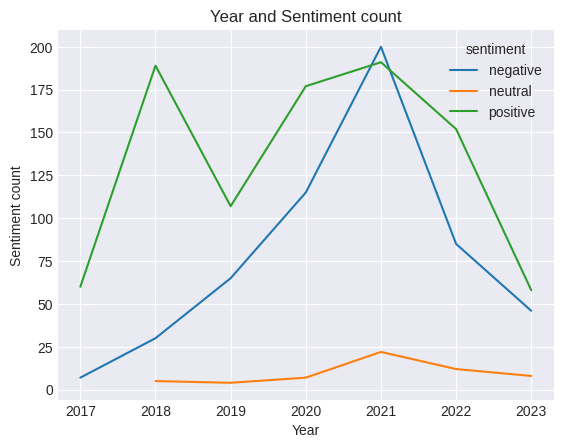

In [ ]:
# Extract the year and create a new column 'year'
df['year'] = df['date'].dt.year

# Group by 'year' and 'sentiment' and count the occurrences
sentiment_counts = df.groupby(['year', 'sentiment'])['sentiment'].count().unstack()

# Plot the sentiment counts
sentiment_counts.plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

## Day of month vs Reviews count

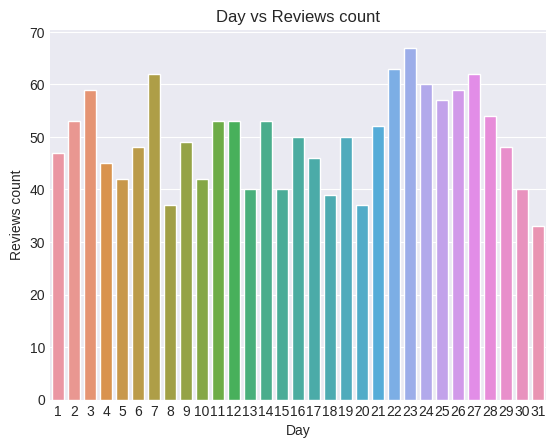

In [ ]:
# Extract the day and create a new column 'day'
df['day'] = df['date'].dt.day

#Creating a dataframe
day=pd.DataFrame(df.groupby('day')['review'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="review", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

## Sentiment score distribution

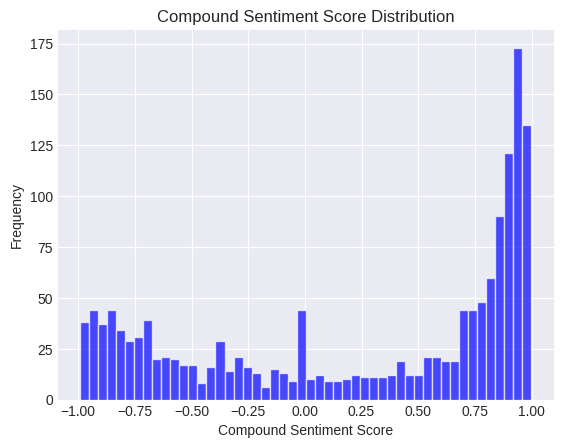

In [ ]:
plt.hist(df['compound_score'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Compound Sentiment Score Distribution')
plt.grid(True)
plt.show()

# Correlation Analysis & Outlier drilldown

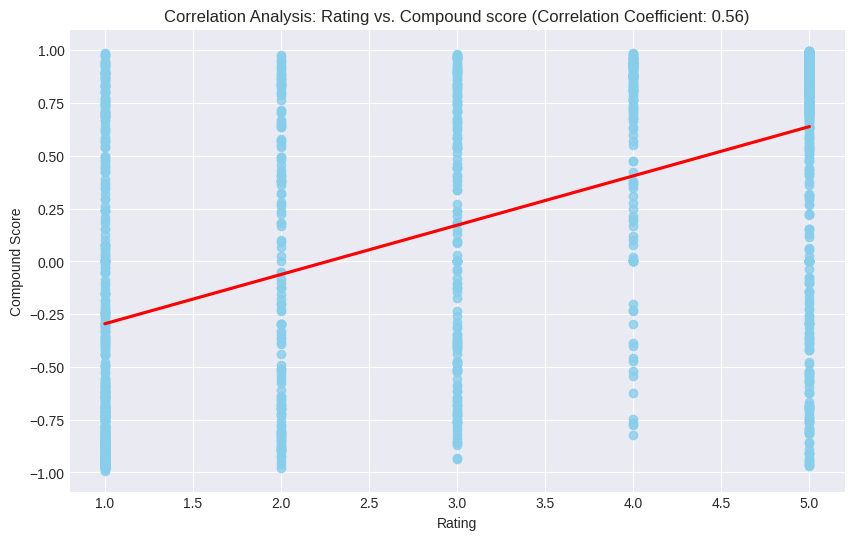

In [ ]:
# Calculate the correlation coefficient
correlation_coefficient = df['rating'].corr(df['compound_score'])

# Create a scatter plot with regression line and different colors for each bar
plt.figure(figsize=(10, 6))
sns.regplot(x="rating", y="compound_score", data=df, ci=None, color='skyblue', line_kws={'color': 'red'})
plt.title(f"Correlation Analysis: Rating vs. Compound score (Correlation Coefficient: {correlation_coefficient:.2f})")
plt.xlabel("Rating")
plt.ylabel("Compound Score")
plt.show()

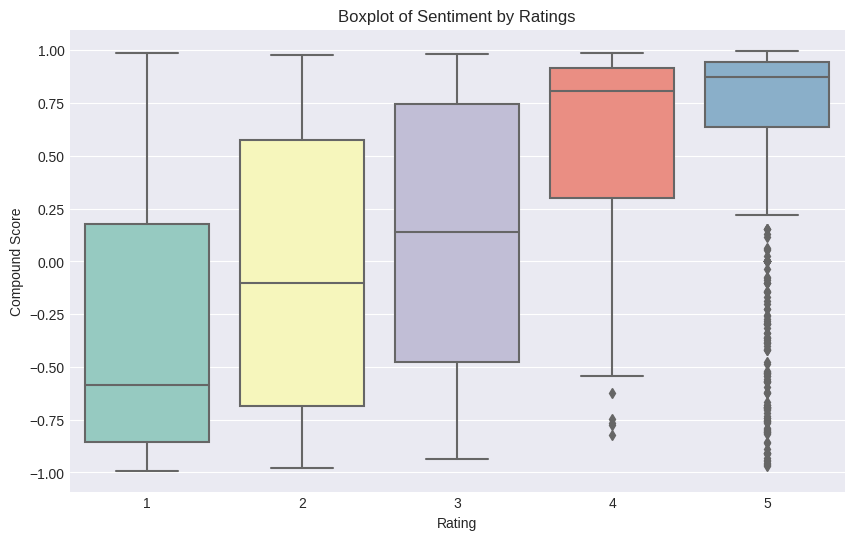

In [ ]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='compound_score', data=df, palette="Set3")
plt.title("Boxplot of Sentiment by Ratings")
plt.xlabel("Rating")
plt.ylabel("Compound Score")
plt.show()

#### We can see a lot of outliers within the **5-star reviews** given that the sentiment score is **negative**.

In [ ]:
# Count the number of outliers
outliers_count = len(df[(df['sentiment'] == 'negative') & (df['rating'] == 5)])

# Count the total number of 5-star reviews
total_5_star_reviews = len(df[df['rating'] == 5])

# Count the total number of negative reviews
total_negative_reviews = len(df[df['sentiment'] == 'negative'])

# Print the counts
print("Number of Outliers (Negative Sentiment in 5-Star Reviews):", outliers_count)
print("Total Number of 5-Star Reviews:", total_5_star_reviews)
print("Total Number of Negative Reviews:", total_negative_reviews)

# Calculate the percentage of negative sentiment in 5-star reviews
percentage_negative_in_5_star = (outliers_count / total_5_star_reviews) * 100
print("Percentage of Negative Sentiment in 5-Star Reviews:", percentage_negative_in_5_star, "%")

# Filter the DataFrame to get negative sentiment 5-star reviews
outliers_df = df[(df['sentiment'] == 'negative') & (df['rating'] == 5)]

Number of Outliers (Negative Sentiment in 5-Star Reviews): 95
Total Number of 5-Star Reviews: 669
Total Number of Negative Reviews: 548
Percentage of Negative Sentiment in 5-Star Reviews: 14.200298953662182 %


In [ ]:
outlier_clean = outliers_df['review'].apply(preprocess)
outlier_nouns_adj = outlier_clean.apply(get_nouns_adjs)
doc= list(outlier_nouns_adj)
phrases = gensim.models.Phrases(doc, min_count=10, threshold=20)
bigram_model = gensim.models.phrases.Phraser(phrases)
# Checkout most frequent bigrams :
bigram_counter1= Counter()
for key in phrases.vocab.keys():
    if key not in stopwords.words('english'):
        if len(str(key).split('_'))>1:
            bigram_counter1[key]+=phrases.vocab[key]

for key, counts in bigram_counter1.most_common(20):
    print(key,">>>>", counts)

customer_service >>>> 12
item_cart >>>> 4
item_available >>>> 4
call_customer >>>> 3
item_item >>>> 3
service_costumer >>>> 2
zara_customer >>>> 2
something_wrong >>>> 2
item_cancel >>>> 2
zara_time >>>> 2
wait_agent >>>> 2
return_policy >>>> 2
show_clothes >>>> 2
card_option >>>> 2
item_prepared. >>>> 2
prepared._item >>>> 2
hard_find >>>> 2
love_zara >>>> 2
user_experience >>>> 2
return_item >>>> 2


customer_service" is the most common bigram, suggesting that customers frequently mention their experiences with customer service. Zara might need to pay attention to customer service quality and responsiveness within their app.